<a href="https://colab.research.google.com/github/pavi-1994/retail_customer_segmentation_capstone_project/blob/main/retail_customer_segmentation_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Problem Description </b>

### In this project, our goal is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
# for visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#filepath
file_path="/content/drive/MyDrive/almabetter/module 4/capstone project_4/customer segmentation/Online Retail.xlsx - Online Retail.csv"

In [4]:
#loading data
customer_df=pd.read_csv(file_path)
#top five rows
customer_df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [5]:
#bottom 5 rows
customer_df.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [6]:
print(f'shape of the customer_df {customer_df.shape}')

shape of the customer_df (541909, 8)


In [7]:
#create a copy of dataframe
retail_customer_df=customer_df.copy()

In [8]:
#columns present in customer_df
print(f'Feature of customer_df :\n {customer_df.columns}')

Feature of customer_df :
 Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [9]:
# datatypes of features present in the customer_df
print(f'Feature datatype of customer_df :\n\n {customer_df.dtypes}')

Feature datatype of customer_df :

 InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [10]:
#check no of unique element present in each feature (columns)
customer_df.nunique()


InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [11]:
#printing the bike_df information
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


@--Even though INvoiceno should be in integer format but in this dataframe we observe it is in  object datatype
@__InvoiceDate is also in object datatype 
 we need to convert it into correct format.

In [12]:
#using describe function and including all numerical as well as categorical feature
customer_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
InvoiceNo,541909,25900,573585,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,541909,4070,85123A,2313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,541909.0,NaN,NaN,NaN,9.55225,218.081158,-80995.0,1.0,3.0,10.0,80995.0
InvoiceDate,541909,23260,10/31/11 14:41,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UnitPrice,541909.0,NaN,NaN,NaN,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,NaN,NaN,NaN,15287.69057,1713.600303,12346.0,13953.0,15152.0,16791.0,18287.0
Country,541909,38,United Kingdom,495478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Handling Missing Values

In [13]:
def missing_value_percent(df):
    ''' function receives dataframe as input
    prints the features with missing value and percentage of missing values'''
    
    print('Missing Data Count')
    print(df.isnull().sum().sort_values(ascending = False))

    print('--'*50)
    print('Missing Data Percentage')
    print(f'{round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)}%')

In [14]:
  #checking for null value 
missing_value_percent(customer_df)

Missing Data Count
CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
CustomerID     24.93
Description     0.27
InvoiceNo       0.00
StockCode       0.00
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
Country         0.00
dtype: float64%


In [15]:
customer_df[customer_df.Description.isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/10 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/10 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/10 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/10 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/10 14:34,0.0,NaN,United Kingdom


In [16]:
customer_df[customer_df.CustomerID.isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/10 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/10 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/10 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/10 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/10 14:32,1.66,NaN,United Kingdom


#### There are 24% of data of feature customer id and 0.27% of description features are missing. It is better to drop all the missing data from the customer_df

### but we can replace null vallue of description with unknown

In [17]:
customer_df['Description'] =customer_df['Description'].fillna('Unknown')

In [18]:
#drop nan values
customer_df.dropna(inplace=True)

In [19]:
#checking for null value 
missing_value_percent(customer_df)

Missing Data Count
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64%


### Dealing with duplicated rows

In [20]:
#checking for duplicate rows
print(f' Number of duplicated observation present in the dataset\n{customer_df.duplicated().sum()}')

 Number of duplicated observation present in the dataset
5225


In [21]:
# duplicate observations
customer_df[customer_df.duplicated()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/10 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/10 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/10 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/10 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/10 11:49,2.95,17920.0,United Kingdom


In [22]:
#drop duplicate rows
customer_df.drop_duplicates(inplace=True)
print(f'Shape of dataset after dealing with missing values and duplicated values{customer_df.shape}')

Shape of dataset after dealing with missing values and duplicated values(401604, 8)


In [23]:
#count of observation whose length of stockcode less than 5
print("\n'StockCode' length less than 5\n")
print(((customer_df['StockCode'].str.len())<5).value_counts())

#droping the observation whose stockcode length < 5
customer_df=customer_df.drop(customer_df[(customer_df['StockCode'].str.len())<5].index)

print(f"after droping observations based on length of stockcode <5 is {customer_df.shape}")


'StockCode' length less than 5

False    399701
True       1903
Name: StockCode, dtype: int64
after droping observations based on length of stockcode <5 is (399701, 8)


### Drop rows which have InvoiceNo length less than 6 and greater than 6

In [24]:
#value_count on InvoiceNo
customer_df["InvoiceNo"].value_counts()

576339     541
579196     532
580727     528
578270     441
573576     434
          ... 
573316       1
573322       1
553043       1
573327       1
C573541      1
Name: InvoiceNo, Length: 21799, dtype: int64

we can observe here that length of InvoiceNo greater than 6 means it starts with C. That means product which was cancelled. we will drop the  InvoiceNo whose length greater than 6

In [25]:
#'InvoiceNo' length less than 6
print("\n'InvoiceNo' length less than 6\n")
print(((customer_df['InvoiceNo'].str.len())<6).value_counts())

#'InvoiceNo' length greater than 6
print("\n'InvoiceNo' have c value\n")
print((customer_df['InvoiceNo'].str.contains('C')).value_counts())

#droping the observations 
customer_df=customer_df.drop(customer_df[(customer_df['InvoiceNo'].str.contains('C'))].index)
print(f"after droping observations based on length of  InvoiceNo greater than 6is {customer_df.shape}")


'InvoiceNo' length less than 6

False    399701
Name: InvoiceNo, dtype: int64

'InvoiceNo' have c value

False    391195
True       8506
Name: InvoiceNo, dtype: int64
after droping observations based on length of  InvoiceNo greater than 6is (391195, 8)


#### Correcting feature format

In [26]:
##correcting feature format
customer_df['InvoiceDate'] = pd.to_datetime(customer_df['InvoiceDate'])

#creating new features from InvoiceDate extracting year, month,quater,week,weekday,day,dayofyear,time
customer_df['Year'] = customer_df['InvoiceDate'].dt.year
customer_df['Month'] = customer_df['InvoiceDate'].dt.month_name()
customer_df['Quarter'] = pd.DatetimeIndex(customer_df['InvoiceDate']).quarter
customer_df['Week'] = pd.DatetimeIndex(customer_df['InvoiceDate']).week
customer_df['Weekday'] = pd.DatetimeIndex(customer_df['InvoiceDate']).weekday
customer_df['Day'] = pd.DatetimeIndex(customer_df['InvoiceDate']).day
customer_df['hour'] = customer_df['InvoiceDate'].dt.hour
customer_df["minute"] = customer_df['InvoiceDate'].dt.minute

In [27]:
#  convert the customerid feature into int datatype
customer_df['CustomerID'] =(customer_df['CustomerID']).astype(int)

### Feature engineering 

#### Creating new feature Total_Amount using Quantity and UnitPrice

In [28]:
# create a column'Total_Amount' by using Quantity and UnitPrice features
customer_df['Total_Amount']=customer_df['Quantity'] * customer_df['UnitPrice']

In [29]:
customer_df.describe(include="all").T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
InvoiceNo,391195,18416,576339,541,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,391195,3660,85123A,2023,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,391195,3872,WHITE HANGING HEART T-LIGHT HOLDER,2016,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,391195.0,NaN,NaN,NaN,NaT,NaT,13.179292,181.904625,1.0,2.0,6.0,12.0,80995.0
InvoiceDate,391195,17179,2011-11-14 15:27:00,541,2010-12-01 08:26:00,2011-12-09 12:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UnitPrice,391195.0,NaN,NaN,NaN,NaT,NaT,2.874464,4.285058,0.0,1.25,1.95,3.75,649.5
CustomerID,391195.0,NaN,NaN,NaN,NaT,NaT,15295.072889,1710.349337,12346.0,13969.0,15158.0,16794.0,18287.0
Country,391195,37,United Kingdom,348904,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,391195.0,NaN,NaN,NaN,NaT,NaT,2010.934629,0.247181,2010.0,2011.0,2011.0,2011.0,2011.0
Month,391195,12,November,62951,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exploratory data analysis:

**Which Country makes the most transactions?**

countries which do more transaction
United Kingdom    348904
Germany             8644
France              8019
EIRE                7128
Spain               2418
Netherlands         2326
Belgium             1935
Switzerland         1811
Portugal            1416
Australia           1183
Name: Country, dtype: int64




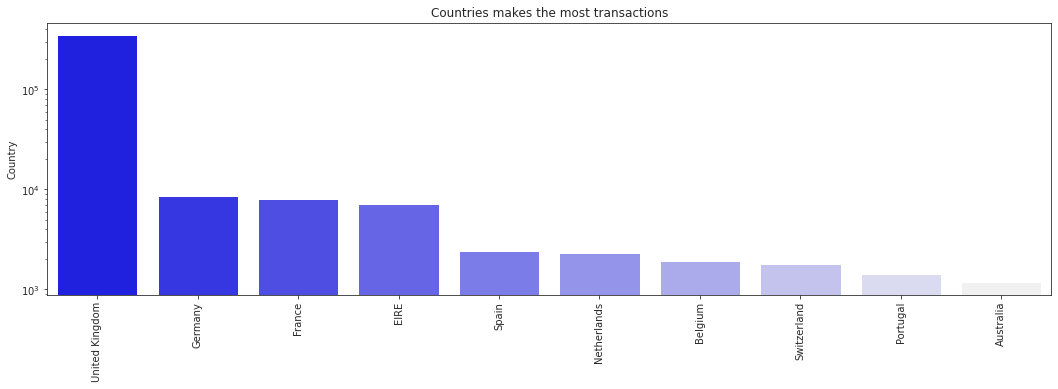

In [30]:
#countries which do more transaction
print("countries which do more transaction")
top_country_transaction=customer_df['Country'].value_counts().iloc[0:10]
print(top_country_transaction)
print("\n")

#Countries makes the least transactions
sns.set_style('ticks')
plt.figure(figsize=(18,5));
pal = sns.light_palette("blue",n_colors=len(top_country_transaction))
sns.barplot(x=top_country_transaction.index, y=top_country_transaction, palette=np.array(pal[::-1]))
plt.title('Countries makes the most transactions')
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

countries which do less transaction
Malta                   109
United Arab Emirates     67
European Community       57
RSA                      57
Lebanon                  45
Lithuania                35
Brazil                   32
Czech Republic           24
Bahrain                  17
Saudi Arabia              9
Name: Country, dtype: int64




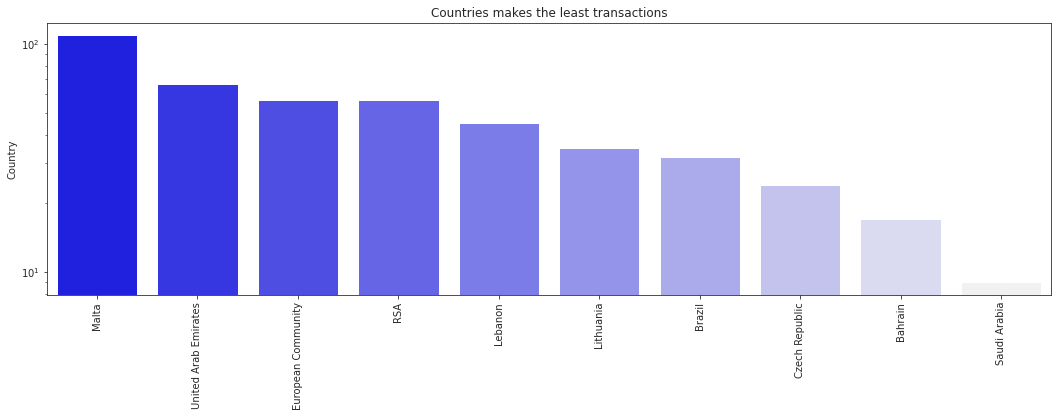

In [31]:
#countries which do less transaction
print("countries which do less transaction")
low_country_transaction=customer_df['Country'].value_counts().iloc[-10:]
print(low_country_transaction)
print("\n")

#Countries makes the least transactions
sns.set_style('ticks')
plt.figure(figsize=(18,5));
low_country_transaction=customer_df['Country'].value_counts().iloc[-10:]
pal = sns.light_palette("blue",n_colors=len(low_country_transaction))
sns.barplot(x=low_country_transaction.index, y=low_country_transaction, palette=np.array(pal[::-1]))
plt.title('Countries makes the least transactions')
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

### stock code which are high on demand





 stock code which are high on demand
85123A    2023
22423     1714
85099B    1615
84879     1395
47566     1390
20725     1304
22720     1152
23203     1091
20727     1078
22383     1063
Name: StockCode, dtype: int64




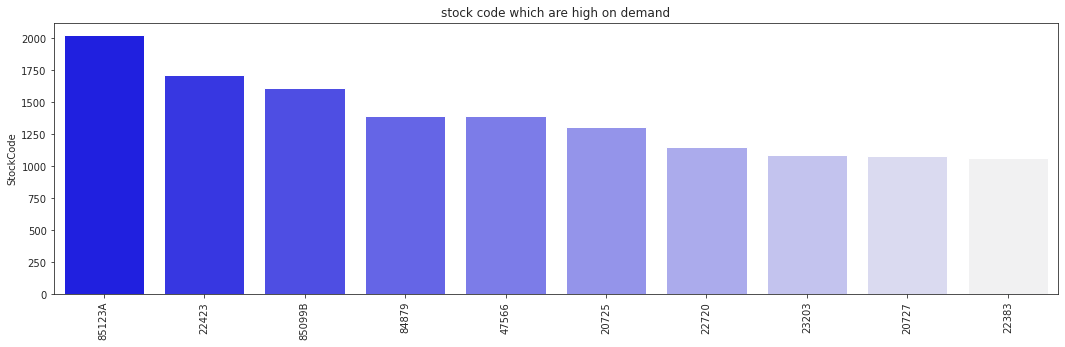

In [32]:
# stock code which are high on demand
print(" stock code which are high on demand")
top_10_stockcode=customer_df['StockCode'].value_counts().iloc[0:10]
print(top_10_stockcode)
print("\n")

#visualize using bar
sns.set_style('ticks')
plt.figure(figsize=(18,5));
pal = sns.light_palette("blue",n_colors=len(top_10_stockcode))
sns.barplot(x=top_10_stockcode.index, y=top_10_stockcode, palette=np.array(pal[::-1]))
plt.title('stock code which are high on demand')
plt.xticks(rotation=90)
plt.show()

In [33]:
print("most popular product based on stockcode few of them listed here:"+ str(top_10_stockcode[:5].index))

most popular product based on stockcode few of them listed here:Index(['85123A', '22423', '85099B', '84879', '47566'], dtype='object')


### stock code which are on less demand

 stock code which are high on demand
90038C    1
62096B    1
90059A    1
20678     1
90059D    1
90168     1
90169     1
90202A    1
90118     1
23843     1
Name: StockCode, dtype: int64




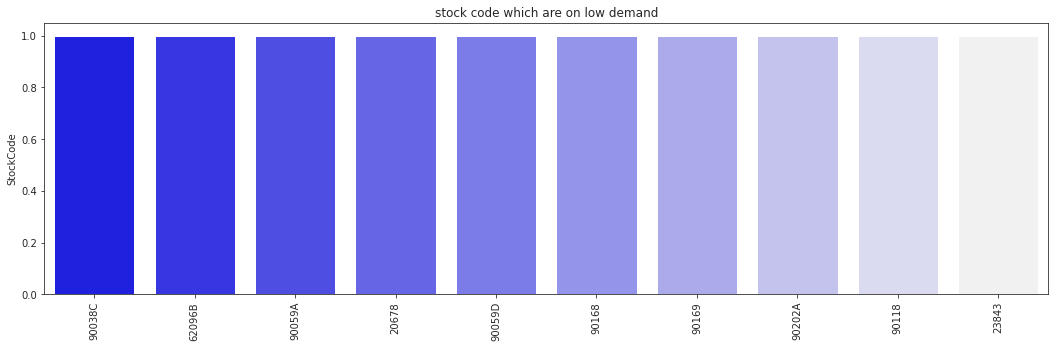

In [34]:
# stock code which are on low demand
print(" stock code which are high on demand")
bottom_10_stockcode=customer_df['StockCode'].value_counts().iloc[-10:]
print(bottom_10_stockcode)
print("\n")

#visualize using bar
sns.set_style('ticks')
plt.figure(figsize=(18,5));
pal = sns.light_palette("blue",n_colors=len(bottom_10_stockcode))
sns.barplot(x=bottom_10_stockcode.index, y=bottom_10_stockcode, palette=np.array(pal[::-1]))
plt.title('stock code which are on low demand')
plt.xticks(rotation=90)
plt.show()

In [35]:
print("less popular product based on stockcodefew of them listed here:"+ str(bottom_10_stockcode[:5].index))

less popular product based on stockcodefew of them listed here:Index(['90038C', '62096B', '90059A', '20678', '90059D'], dtype='object')


 top 10 products which are given Description 
WHITE HANGING HEART T-LIGHT HOLDER    2016
REGENCY CAKESTAND 3 TIER              1714
JUMBO BAG RED RETROSPOT               1615
ASSORTED COLOUR BIRD ORNAMENT         1395
PARTY BUNTING                         1390
LUNCH BAG RED RETROSPOT               1303
SET OF 3 CAKE TINS PANTRY DESIGN      1152
LUNCH BAG  BLACK SKULL.               1078
PACK OF 72 RETROSPOT CAKE CASES       1050
SPOTTY BUNTING                        1014
PAPER CHAIN KIT 50'S CHRISTMAS        1003
LUNCH BAG SPACEBOY DESIGN              993
HEART OF WICKER SMALL                  979
LUNCH BAG CARS BLUE                    977
NATURAL SLATE HEART CHALKBOARD         972
LUNCH BAG PINK POLKADOT                941
LUNCH BAG SUKI DESIGN                  915
REX CASH+CARRY JUMBO SHOPPER           897
ALARM CLOCK BAKELIKE RED               886
JUMBO BAG PINK POLKADOT                884
Name: Description, dtype: int64




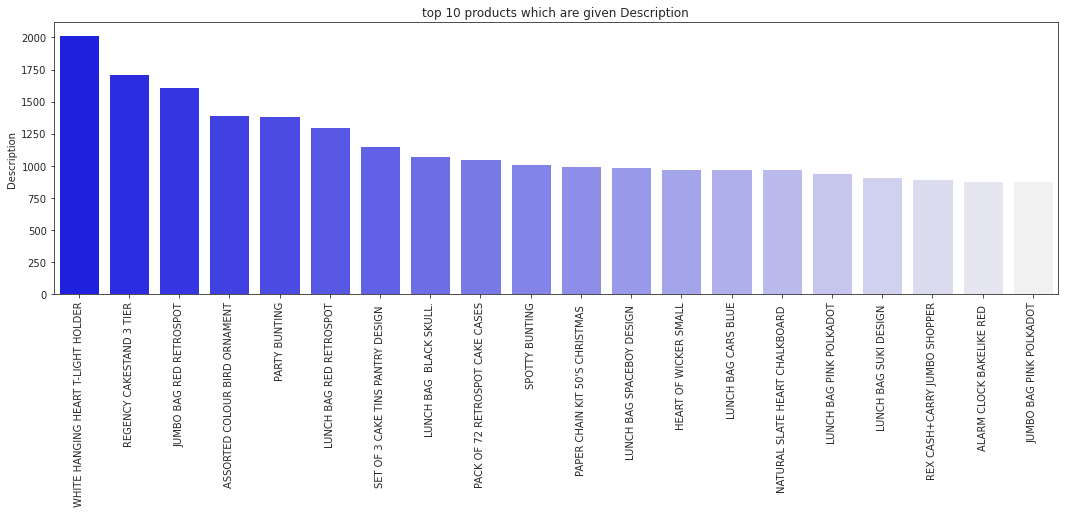

In [36]:
# top to products based on description
print(" top 10 products which are given Description ")
top_20_description=customer_df['Description'].value_counts().iloc[0:20]
print(top_20_description)
print("\n")

#visualize using bar
sns.set_style('ticks')
plt.figure(figsize=(18,5));
pal = sns.light_palette("blue",n_colors=len(top_20_description))
sns.barplot(x=top_20_description.index, y=top_20_description, palette=np.array(pal[::-1]))
plt.title('top 10 products which are given Description')
plt.xticks(rotation=90)
plt.show()

In [37]:
print("most popular product few of them listed here:"+ str(top_20_description[:5].index))

most popular product few of them listed here:Index(['WHITE HANGING HEART T-LIGHT HOLDER', 'REGENCY CAKESTAND 3 TIER',
       'JUMBO BAG RED RETROSPOT', 'ASSORTED COLOUR BIRD ORNAMENT',
       'PARTY BUNTING'],
      dtype='object')


 products based on less no.of description 
PINK CHRYSANTHEMUMS ART FLOWER         1
GARLAND, MAGIC GARDEN 1.8M             1
WRAP  PINK FLOCK                       1
PINK CHRISTMAS FLOCK DROPLET           1
VINTAGE BLUE TINSEL REEL               1
JARDIN ETCHED GLASS BUTTER DISH        1
JAM JAR WITH BLUE LID                  1
DOTCOMGIFTSHOP TEA TOWEL               1
WEEKEND BAG VINTAGE ROSE PAISLEY       1
MINT DINER CLOCK                       1
NEW BAROQUE B'FLY NECKLACE CRYSTAL     1
PINK ACRYLIC JEWEL SNOWFLAKE           1
NEW BAROQUE B'FLY NECKLACE GREEN       1
HAPPY BIRTHDAY CARD TEDDY/CAKE         1
SET/3 FLORAL GARDEN TOOLS IN BAG       1
DIAMANTE NECKLACE                      1
SCALLOP SHELL SOAP DISH                1
BLUE FELT HANGING HEART WITH FLOWER    1
NECKLACE+BRACELET SET PINK DAISY       1
PAPER CRAFT , LITTLE BIRDIE            1
Name: Description, dtype: int64




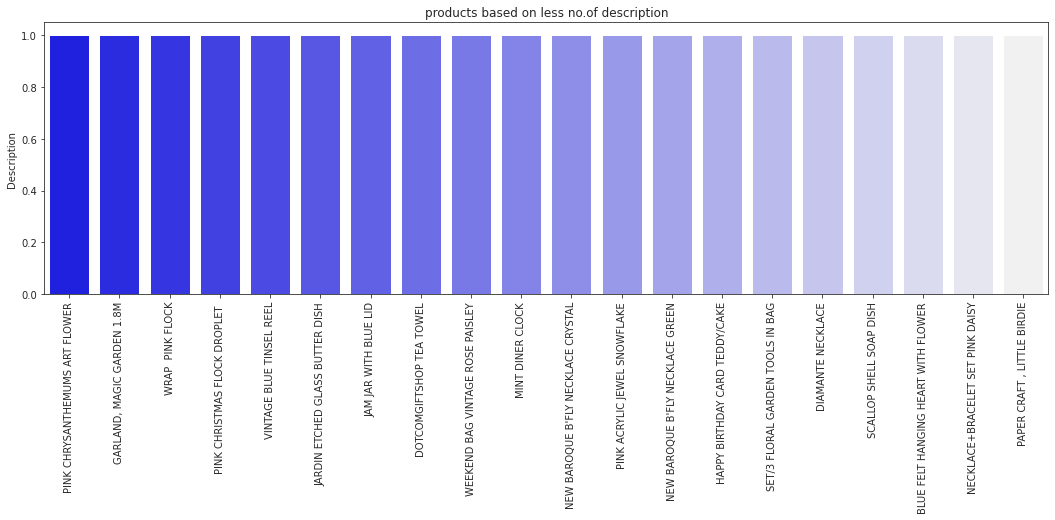

In [38]:
#  products based on less no.of description 
print(" products based on less no.of description ")
bottom_20_description=customer_df['Description'].value_counts().iloc[-20:]
print(bottom_20_description)
print("\n")

#visualize using bar
sns.set_style('ticks')
plt.figure(figsize=(18,5));
pal = sns.light_palette("blue",n_colors=len(bottom_20_description))
sns.barplot(x=bottom_20_description.index, y=bottom_20_description, palette=np.array(pal[::-1]))
plt.title('products based on less no.of description')
plt.xticks(rotation=90)
plt.show()

In [39]:
print("less popular product few of them listed here:"+ str(bottom_20_description[:5].index))

less popular product few of them listed here:Index(['PINK CHRYSANTHEMUMS ART FLOWER', 'GARLAND, MAGIC GARDEN 1.8M',
       'WRAP  PINK FLOCK', 'PINK CHRISTMAS FLOCK DROPLET ',
       'VINTAGE BLUE TINSEL REEL'],
      dtype='object')


**From this analysis we can observe that there are products which have given more than 1000 descriptions also there are products which have only one description**

## how many customer are present

In [40]:
no_of_unique_customers=len(list(customer_df["CustomerID"].unique()))
print(f'There are {no_of_unique_customers} of unique customers are present')

There are 4336 of unique customers are present


 top 10 customers 
17841    7667
14911    5586
14096    5095
12748    4397
14606    2675
15311    2366
14646    2064
13089    1814
13263    1663
14298    1637
Name: CustomerID, dtype: int64




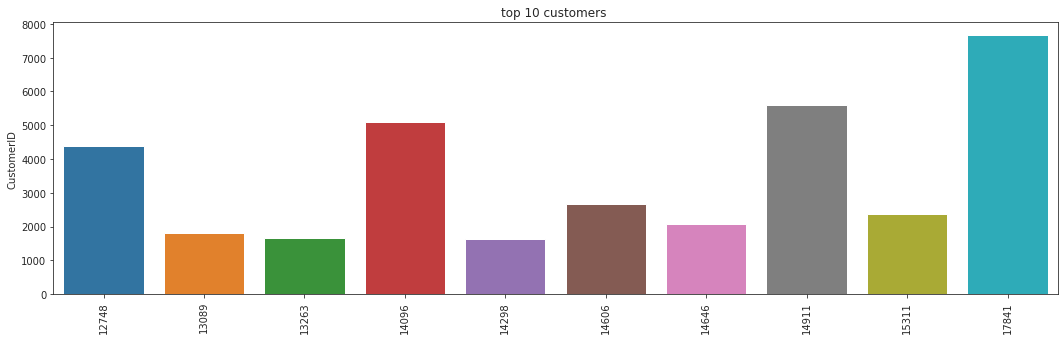

In [41]:
# based on customerid
print(" top 10 customers ")
top_10_customers=customer_df["CustomerID"].value_counts().iloc[:10]
print(top_10_customers)
print("\n")

#visualize using bar
sns.set_style('ticks')
plt.figure(figsize=(18,5));
pal = sns.light_palette("blue",n_colors=len(top_10_customers))
sns.barplot(x=top_10_customers.index, y=top_10_customers)#, palette=np.array(pal[::-1]))
plt.title('top 10 customers ')
plt.xticks(rotation=90)
plt.show()

In [42]:
print("Regular customer who by in large quantity:"+ str(top_10_customers.index))

Regular customer who by in large quantity:Int64Index([17841, 14911, 14096, 12748, 14606, 15311, 14646, 13089, 13263,
            14298],
           dtype='int64')


 bottom 10 customers 
17763    1
15940    1
16765    1
15823    1
16073    1
12603    1
18184    1
15313    1
17347    1
13270    1
Name: CustomerID, dtype: int64




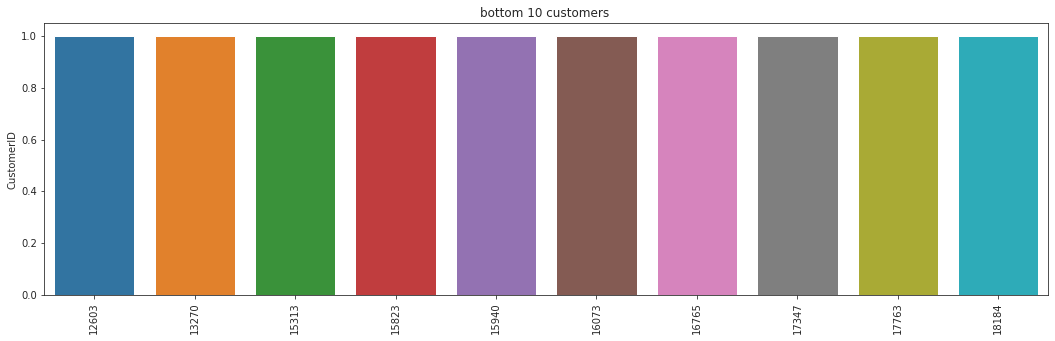

In [43]:
# based on customerid
print(" bottom 10 customers ")
bottom_10_customers=customer_df["CustomerID"].value_counts().iloc[-10:]
print(bottom_10_customers)
print("\n")

#visualize using bar
sns.set_style('ticks')
plt.figure(figsize=(18,5));
pal = sns.light_palette("blue",n_colors=len(bottom_10_customers))
sns.barplot(x=bottom_10_customers.index, y=bottom_10_customers)
plt.title('bottom 10 customers ')
plt.xticks(rotation=90)
plt.show()

In [44]:
print("Customer who are not a frequently buy  quantity:"+ str(bottom_10_customers.index))

Customer who are not a frequently buy  quantity:Int64Index([17763, 15940, 16765, 15823, 16073, 12603, 18184, 15313, 17347,
            13270],
           dtype='int64')


In [45]:
customer_df.groupby(["CustomerID","StockCode"])["Quantity"].sum().reset_index(name='sum').sort_values(['sum'], ascending=False).head()

,CustomerID,StockCode,sum
185342,16446,23843,80995
0,12346,23166,74215
42143,13256,84826,12540
253809,17949,22197,11692
184264,16422,17003,10080


here we can see that customerid, we can assume them as whole sellers

1.   customerid 16446 has ordered stock code in a large quantity 80995units
2.   customerid 12346	 has order stockcode 23166 in large quantity 74215
3.   customerid 13256	 has order stockcode	84826 in large quantity	12540

there few customer they are not wholesellers as listed below:

In [46]:
customer_df.groupby(["CustomerID","StockCode"])["Quantity"].sum().reset_index(name='sum').sort_values(['sum'], ascending=False).tail()

,CustomerID,StockCode,sum
198799,16764,22385,1
198800,16764,22386,1
198805,16764,22427,1
66167,13869,22430,1
142192,15460,85049E,1


## UnitPrice

In [47]:
def visualize_continuous_feature(feature_name):
   
    print(f'In UnitPrice feature no.of unique values present is : {customer_df[feature_name].nunique()}')
    print("\n")
    print(customer_df[feature_name].value_counts().head(10))
    print("\n")
    print(customer_df[feature_name].value_counts().tail(10))
    
    # set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
    sns.set(style="darkgrid")
    
    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    
    # assigning a graph to each ax
    sns.boxplot(customer_df[feature_name], ax=ax_box)
    sns.distplot(customer_df[feature_name], ax=ax_hist)



In UnitPrice feature no.of unique values present is : 357


1.25    45081
1.65    36277
2.95    26146
0.85    25639
0.42    21543
4.95    17910
3.75    17438
2.10    16884
2.08    15565
1.95    12512
Name: UnitPrice, dtype: int64


1.60      1
2.85      1
9.42      1
175.00    1
4.86      1
3.98      1
6.78      1
1.02      1
12.00     1
12.95     1
Name: UnitPrice, dtype: int64


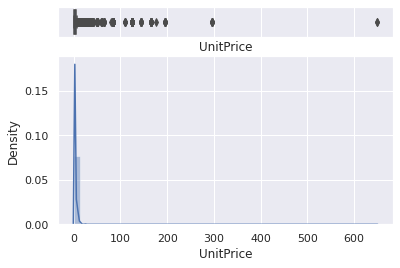

In [48]:
visualize_continuous_feature("UnitPrice")

we can observe here that products with lower unitprice has bought in larger quantity. than higher unitprice. this feature is highly right skewed.

In UnitPrice feature no.of unique values present is : 300


1     68966
12    59813
2     57099
6     37423
4     31980
3     26607
24    23692
10    21156
8     11565
5      8038
Name: Quantity, dtype: int64


660      1
1515     1
323      1
1600     1
98       1
4300     1
608      1
552      1
906      1
80995    1
Name: Quantity, dtype: int64


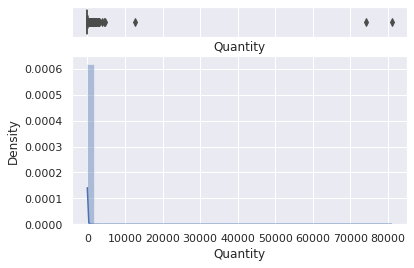

In [49]:
visualize_continuous_feature("Quantity")

we can see from above visualization 
1. items which are bought in large quantity  are less frequent
2. items which are bought in single unit is highly frequent

or we can say that whole seller customers buy once  in a year or quaterly basis.

In UnitPrice feature no.of unique values present is : 2857


15.00    19974
17.70     9156
16.50     8470
10.20     8009
19.80     7608
1.25      7055
3.75      6629
10.50     5528
20.80     5510
1.65      5359
Name: Total_Amount, dtype: int64


7.35       1
537.90     1
481.50     1
1226.40    1
597.60     1
27.60      1
24.38      1
1305.60    1
277.92     1
66.36      1
Name: Total_Amount, dtype: int64


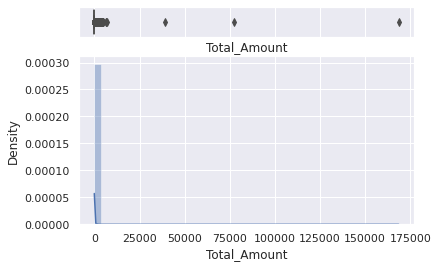

In [50]:
visualize_continuous_feature("Total_Amount")

As product becomes costlier total money spent to buy is less. or we can say preference to buy product decreases as product becomes costlier 

### Year

In [51]:
#unique items
customer_df["Year"].unique()

array([2010, 2011])

In [52]:
#groupby function with aggregating using sum
customer_df.groupby("Year")["Total_Amount"].sum()

Year
2010     565214.560
2011    8172178.081
Name: Total_Amount, dtype: float64

Total amount of purchase  done by customers  in one month of 2010 is 565214.560.

where as the total purchase done by customers in 11 months of 2011 is 8172178.081


##Month

In [53]:
#aggregate over no of column using groupby function
customer_df.groupby("Month").aggregate({'Quantity':'sum','Total_Amount':'sum'}).sort_values("Total_Amount",ascending=False)

,Quantity,Total_Amount
Month,,
November,674381,1136564.000
December,596470,1077457.640
October,590183,1002356.560
September,542828,938782.631
May,372673,659257.490
June,362725,653264.920
August,397915,635514.380
July,367065,591603.790
March,347284,583143.850


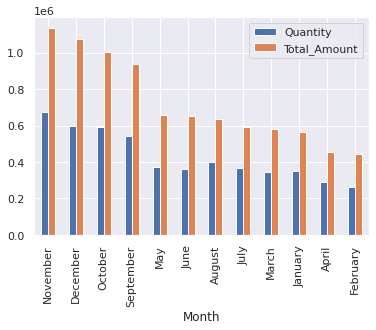

In [54]:
#aggregate over no of column using groupby function and visualize
customer_df.groupby("Month").aggregate({'Quantity':'sum','Total_Amount':'sum'}).sort_values("Total_Amount",ascending=False).plot(kind="bar")


we observed that purchase is high during month september,october,november,december in othermonth the sales is average.

## Weekday

In [55]:
#aggregate over no of column using groupby function
customer_df.groupby("Weekday").aggregate({"Weekday":"count",'Quantity':'sum','Total_Amount':'mean'})

,Weekday,Quantity,Total_Amount
Weekday,,,
0,63972,764940,20.736580
1,65495,1002944,25.536653
2,67774,957866,23.010288
3,78921,1148335,24.572153
4,53948,821069,27.059614
6,61085,460519,12.764816


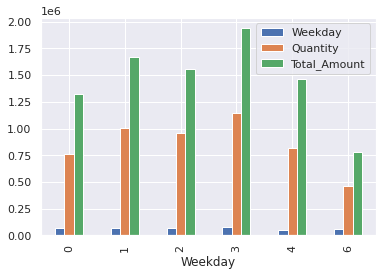

In [56]:
#aggregate over no of column using groupby function and visualize it
customer_df.groupby("Weekday").aggregate({"Weekday":"count",'Quantity':'sum','Total_Amount':'sum'}).plot(kind="bar")

1. we have observed that most of the purchase has done one monday,tuesday,wednesday.

2. no purchase done on friday

3. on saturday less item bought by customer in comparison with other days


##hour


In [57]:
#use value_count to check frequency 
customer_df["hour"].value_counts()

12    70721
13    62804
14    53065
11    48216
15    44620
10    37559
16    23630
9     21787
17    12900
8      8625
19     3230
18     2885
20      777
7       375
6         1
Name: hour, dtype: int64

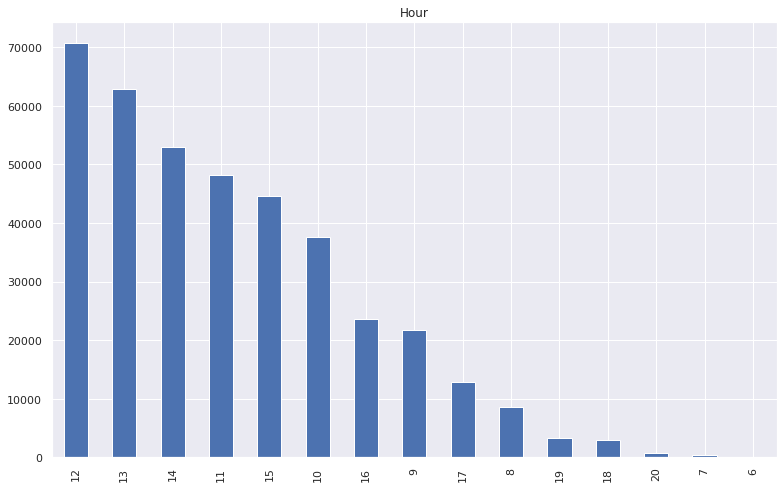

In [58]:
plt.figure(figsize=(13,8))
plt.title('Hour')
customer_df["hour"].value_counts().plot(kind="bar")

In [59]:
##binning hour feature to shift_timings
customer_df['time_shift'] = customer_df['hour'].apply(lambda x: 'morning' if 6<=x<=10 else ('day' if 10<=x<=16 else ('evening' if 17<=x<=19 else 'night')))
customer_df['time_shift'].value_counts()

day        303056
morning     68347
evening     19015
night         777
Name: time_shift, dtype: int64

[Text(0.5, 1.0, 'frequency of hourbased purchase by customers')]

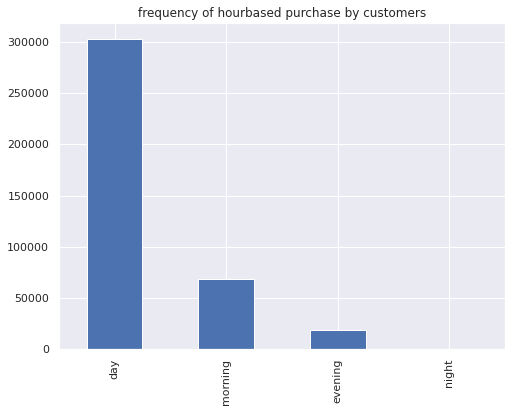

In [60]:
#analysis of data by vizualisation using shift_timings and Bike_Count.
fig,ax=plt.subplots(figsize=(8,6))
customer_df['time_shift'].value_counts().plot(kind="bar")
ax.set(title='frequency of hourbased purchase by customers')

we can observe that customer purchase  frequency is high during day time. very less during night time.

RFM 

1.**Recency**: earliest Invoice Date – First Purchase Date

¡    Number of days since a customer made the last purchase

ii.  Or last visit day or the last login time

iii. Lower the better


2.**frequency**:  Number of Invoices grouped by Customer ID

i.  The number of purchases made in a given period

ii  How often a customer use our products/services

¡ii Higher the better




3.**Monetory**:Total_Amount( Unit Price * Quantity) grouped by Customer ID

i.Total amount of money a customer spent in a given period

ii.Useful for recognizing opportunities to upsell

iii.¡ Higher the better



In [61]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_df = customer_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'Total_Amount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'Total_Amount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346,325,1,77183.60
1,12347,2,182,4310.00
2,12348,75,27,1437.24
3,12349,18,72,1457.55
4,12350,310,16,294.40


In [62]:
def visulize_features(data,features):

    '''Function takes dataframe and feature name  as input and gives
    statistical and visualization of feature using box and distplot'''

    #use describe to check data distributioon statistically
    print(data[features].describe())

    #visualize the  Frequency
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=data[features])
    fig.set_title(features)
    fig.set_ylabel(features)
    
    #distplot
    plt.subplot(1, 2, 2)
    fig = sns.distplot(data[features])
    #mean line
    plt.axvline(data[features].mean(), color='red', linestyle='dashed', linewidth=2)
    #median line
    plt.axvline(data[features].median(), color='blue', linestyle='dashed', linewidth=2)
    fig.set_title(features)
    fig.set_ylabel('count')
    fig.set_xlabel(features)

    plt.show()


count    4336.000000
mean       92.214483
std       100.199861
min         0.000000
25%        17.000000
50%        50.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64


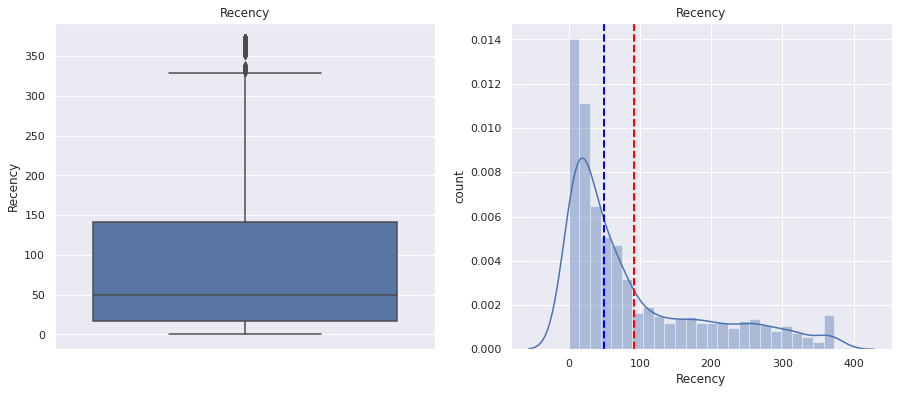

In [63]:
visulize_features(rfm_df,"Recency")

The average recency of totalcustomers present is 92. and also 50% of customers who  returned with in 50 days.

we also observed that most of the customer who return 20- 150 days and there are customer who make one time purchase and never come back again.



count    4336.000000
mean       90.220249
std       224.695609
min         1.000000
25%        17.000000
50%        41.000000
75%        98.000000
max      7667.000000
Name: Frequency, dtype: float64


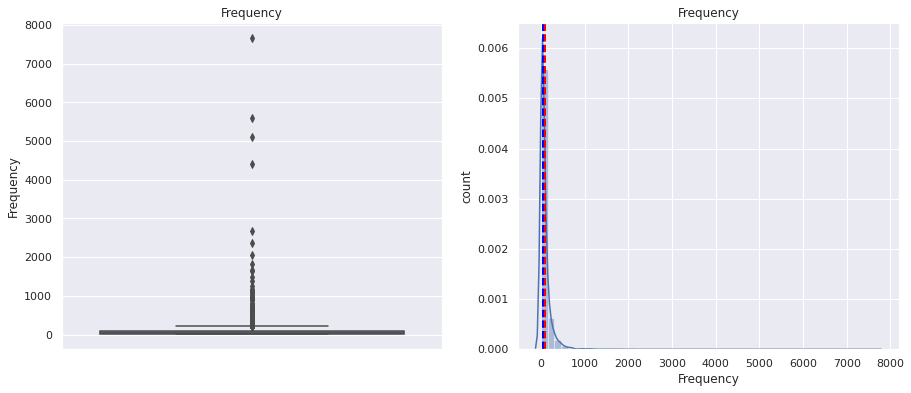

In [64]:
#visualize frequency to check frequency of buying by customers
visulize_features(rfm_df,"Frequency")

We can observe from above distribution that average purchase frequency of customer is 90. And 50% of customer whose purchanse frequency is between 1-41. but there are customers who make purchase items frequently.

count      4336.000000
mean       2015.081329
std        8901.730034
min           0.000000
25%         303.960000
50%         661.420000
75%        1631.327500
max      279138.020000
Name: Monetary, dtype: float64


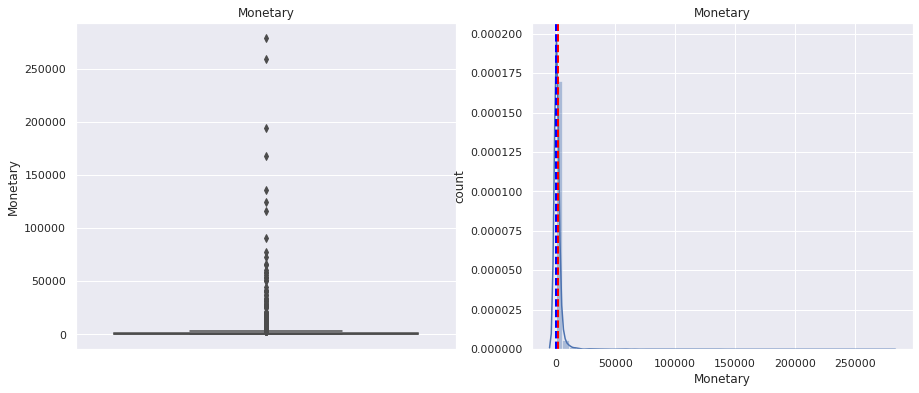

In [65]:
#visualize monetory to check mney spent for  buying by customers
visulize_features(rfm_df,"Monetary")

we can observe from above graph the average of total amount spent by customer   is 2015. The 50% of customer who spents below 661 and 25% of customer who spend above 1631.

In [66]:
rfm_df['R'] = pd.qcut(rfm_df.Recency, q=4,labels=[1,2,3,4])
rfm_df['F'] = pd.qcut(rfm_df.Frequency, q=4,labels=[1,2,3,4])
rfm_df['M'] = pd.qcut(rfm_df.Monetary, q=4,labels=[1,2,3,4])

rfm_df.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346,325,1,77183.60,4,1,4
12347,2,182,4310.00,1,4,4
12348,75,27,1437.24,3,2,3
12349,18,72,1457.55,2,3,3
12350,310,16,294.40,4,1,1


create a new feature  "RFM_segment" and "RFM_score"

In [67]:
def join_rfm(dataframe):
  "recieves dataframe as input  and returns concatinated string format of R,F,and M"
  
  return str(int(dataframe['R'])) + str(int(dataframe['F'])) + str(int(dataframe['M']))



In [68]:
#creating new RFM_Segment by appling  join_rfm function
rfm_df['RFM_Segment'] = rfm_df.apply(join_rfm, axis=1)
#creating new feature that returns sum of R,F and M
rfm_df['RFM_Score'] = rfm_df[['R','F','M']].sum(axis=1)
rfm_df.head()


,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346,325,1,77183.60,4,1,4,414,9.0
12347,2,182,4310.00,1,4,4,144,9.0
12348,75,27,1437.24,3,2,3,323,8.0
12349,18,72,1457.55,2,3,3,233,8.0
12350,310,16,294.40,4,1,1,411,6.0
